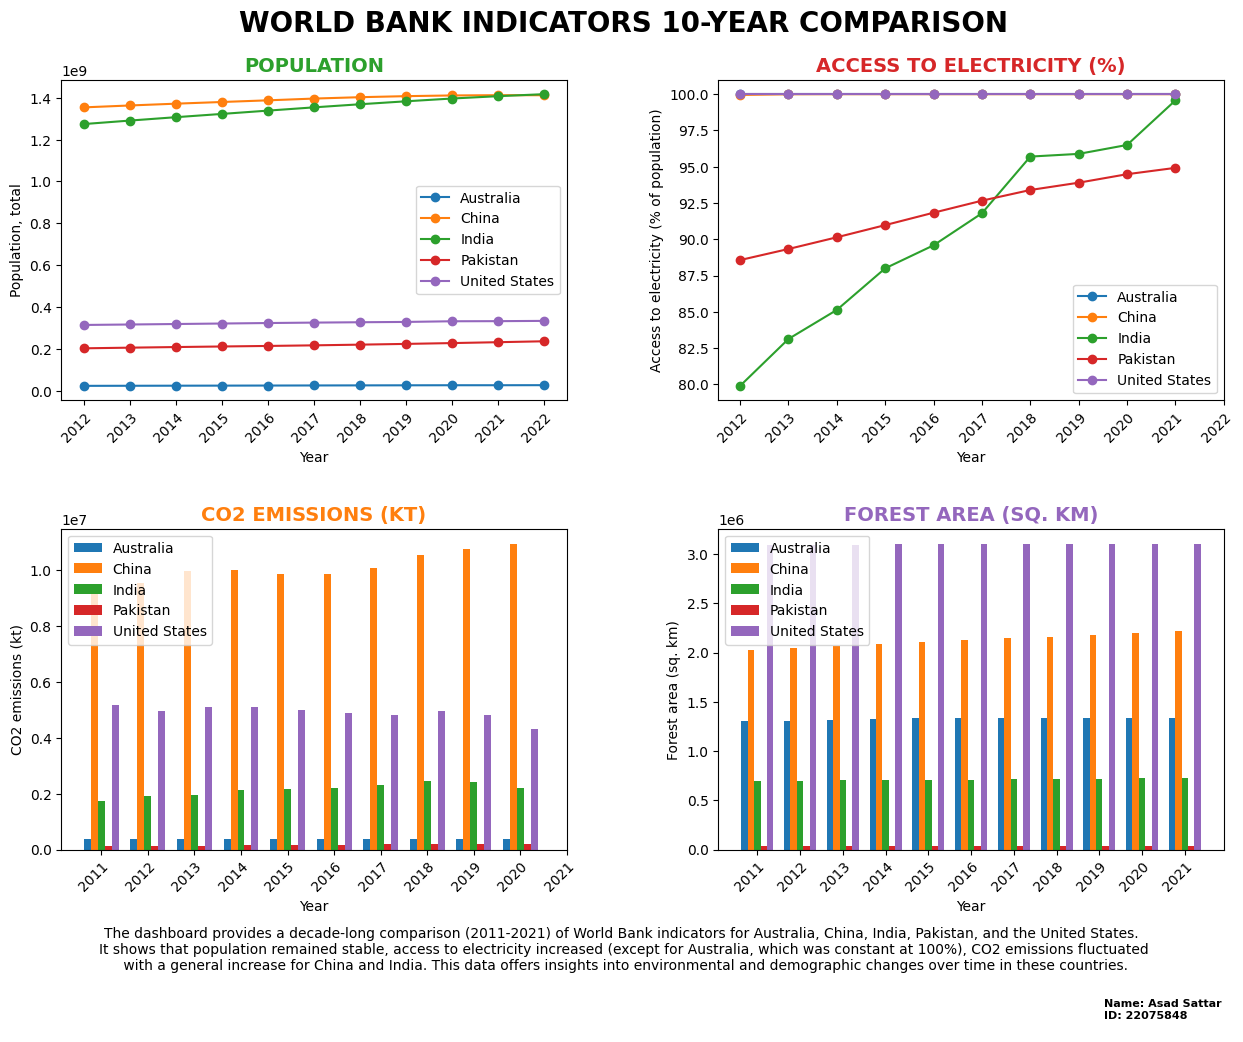

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def read_csv_file(name):
    df = pd.read_csv(name, skiprows=4)
    df.drop(columns=['Country Code', 'Indicator Code'], axis=1, inplace=True)
    years = df.head(0).drop(
        ['Country Name', 'Indicator Name', 'Unnamed: 67'], axis=1)
    return years.T, df

def get_indicator_data(indicator, data):
    return data[data['Indicator Name'] == indicator]

def line_graph(ax, countries, indicator_name):
    cols = ['Country Name', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
    data = get_indicator_data(indicator_name, countries)
    data = data[data['Country Name'].isin(
        ['Australia', 'Pakistan', 'India', 'China', 'United States'])]
    data = data[cols]
    data.set_index('Country Name', inplace=True)

    for country in data.index:
        ax.plot(data.columns, data.loc[country], label=country, marker='o')

    ax.set_xlabel('Year')
    ax.set_ylabel(indicator_name)
    ax.set_title(indicator_name.upper())
    ax.set_xticks(data.columns)
    ax.set_xticklabels(data.columns, rotation=45, ha='right', rotation_mode='anchor')
    ax.legend()

def bar_plot(ax, countries, indicator_name):
    cols = ['Country Name','2011', '2012','2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
    data = get_indicator_data(indicator_name, countries)
    data = data[data['Country Name'].isin(
        ['Pakistan', 'India', 'China', 'Australia', 'United States'])]
    data = data[cols]
    data.set_index('Country Name', inplace=True)

    # Set width of each bar
    bar_width = 0.15

    for i, country in enumerate(data.index):
        # Calculate the position for each bar
        position = [pos + i * bar_width for pos in range(len(data.columns))]
        ax.bar(position, data.loc[country], width=bar_width, label=country)

    # position for x-ticks (centered between the bars)
    tick_positions = [pos + 0.5 * bar_width * (len(data.index) - 1) for pos in range(len(data.columns))]

    ax.set_xlabel('Year')
    ax.set_ylabel(indicator_name)
    ax.set_title(indicator_name.upper())
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(data.columns, rotation=45, ha='right', rotation_mode='anchor')
    ax.legend()

# read csv file
_, countries = read_csv_file('API_19_DS2_en_csv_v2_4756035.csv')

# subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(wspace=0.3, hspace=0.4)

# main title 
plt.suptitle('WORLD BANK INDICATORS 10-YEAR COMPARISON', fontsize=20, y=0.95, color='black', fontweight='bold')

# line graphs with colorful titles
line_graph(axs[0, 0], countries, 'Population, total')
axs[0, 0].set_title('POPULATION', fontsize=14, color='#2CA02C', fontweight='bold')

line_graph(axs[0, 1], countries, 'Access to electricity (% of population)')
axs[0, 1].set_title('ACCESS TO ELECTRICITY (%)', fontsize=14, color='#D62728', fontweight='bold')

# bar plots with colorful titles
bar_plot(axs[1, 0], countries, 'CO2 emissions (kt)')
axs[1, 0].set_title('CO2 EMISSIONS (KT)', fontsize=14, color='#FF7F0E', fontweight='bold')

bar_plot(axs[1, 1], countries, 'Forest area (sq. km)')
axs[1, 1].set_title('FOREST AREA (SQ. KM)', fontsize=14, color='#9467BD', fontweight='bold')

summary_text = '''
The dashboard provides a decade-long comparison (2011-2021) of World Bank indicators for Australia, China, India, Pakistan, and the United States. 
It shows that population remained stable, access to electricity increased (except for Australia, which was constant at 100%), CO2 emissions fluctuated
 with a general increase for China and India. This data offers insights into environmental and demographic changes over time in these countries.
'''
fig.text(0.5, 0.01, summary_text, ha='center', va='center', fontsize=10, color='black')

reg_number='''
Name: Asad Sattar
ID: 22075848
'''
plt.figtext(0.82, -0.05, reg_number, ha='left', va='center', fontsize=8, color='black',fontweight='bold')

# display the plot
plt.show()
